## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Reading the dataset

In [2]:
train = pd.read_csv('../data/train.csv')

## EDA

In [3]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
target_cols = [col for col in train.columns if col not in ['id', 'comment_text']]
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [6]:
print(f'Number of rows in training set: {len(train)}')
print(f'Total Number of toxic comment in training set: {train['toxic'].sum()}')
for i in target_cols:
    if i != 'toxic':
        print(f'\t{i}: {train[i].sum()}')

Number of rows in training set: 159571
Total Number of toxic comment in training set: 15294
	severe_toxic: 1595
	obscene: 8449
	threat: 478
	insult: 7877
	identity_hate: 1405


<Axes: title={'center': 'Correlation Matrix'}>

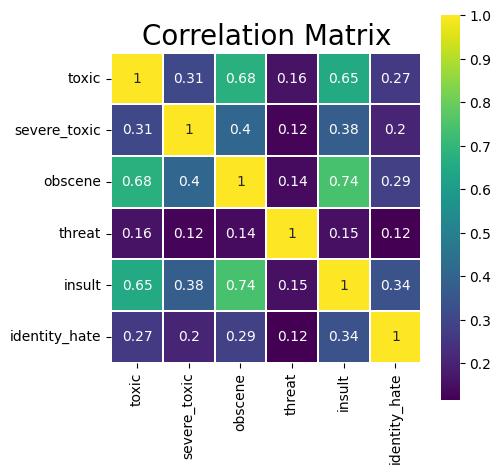

In [7]:
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix', fontsize=20)
sns.heatmap(data=train[target_cols].astype(float).corr(), linewidths=0.1, square=True, annot=True, cmap='viridis')

## Cleaning and preprocessing

In [8]:
def text_cleaner(text: str) -> str:
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", " url ", text)
    text = re.sub(r"\S+@\S+", " email ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [9]:
train_processed = train.drop('id', axis=1)
train_processed['comment_text'] = train_processed['comment_text'].map(lambda text: text_cleaner(text))
train_processed.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
5,congratulations from me as well use the tools ...,0,0,0,0,0,0
6,cocksucker before you piss around on my work,1,1,1,0,1,0
7,your vandalism to the matt shirvington article...,0,0,0,0,0,0
8,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [10]:
train_processed.to_csv('../data/data_processed.csv', index=False)